In [1]:
#Importing Libraries
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [3]:
#Reading dataser
cricket = pd.read_csv("Cricket.csv",encoding = 'ISO-8859-1')

In [4]:
#Inspecting dataset
cricket.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [5]:
#Scaling parameters
cricket1 = cricket.drop("Player",axis=1)


In [25]:
cricket1['Player'] = cricket['Player']

In [26]:
cricket1.head()

,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Player
0,1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,SR Tendulkar (INDIA)
1,2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,KC Sangakkara (Asia/ICC/SL)
2,1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,RT Ponting (AUS/ICC)
3,1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,ST Jayasuriya (Asia/SL)
4,1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,DPMD Jayawardene (Asia/SL)


In [27]:
cricket2 = cricket1[['Player','Ave','SR']]

In [28]:
cricket2 = cricket1[['Player','Ave','SR']]

In [29]:
cricket2.head()

,Player,Ave,SR
0,SR Tendulkar (INDIA),44.83,86.23
1,KC Sangakkara (Asia/ICC/SL),41.98,78.86
2,RT Ponting (AUS/ICC),42.03,80.39
3,ST Jayasuriya (Asia/SL),32.36,91.20
4,DPMD Jayawardene (Asia/SL),33.37,78.96


In [30]:
cricket3 = cricket2[['Ave','SR']]

In [31]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
cricket3 = standard_scaler.fit_transform(cricket3)

In [32]:
cricket3 = pd.DataFrame(cricket3)
cricket3.columns = ['Ave','SR']
cricket3.head()

,Ave,SR
0,1.072294,0.703152
1,0.587725,-0.044139
2,0.596226,0.110997
3,-1.047909,1.207091
4,-0.876185,-0.034000


In [14]:
#Cluster tendency using Hopkins
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [33]:
hopkins(cricket3)

0.7833532967898362

In [35]:
#Silhoute Analysis
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k,random_state=100).fit(cricket3)
    sse_.append([k, silhouette_score(cricket3, kmeans.labels_)])

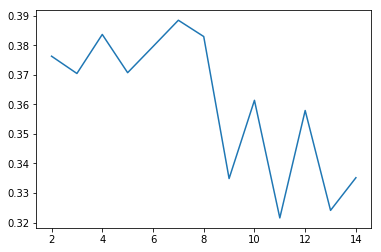

In [20]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

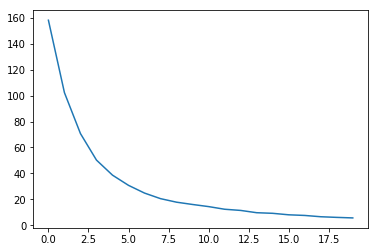

In [36]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(cricket3)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [37]:
# Kmeans with K=5
model_clus4 = KMeans(n_clusters = 4,random_state=100, max_iter=50)
model_clus4.fit(cricket3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=100, tol=0.0001, verbose=0)

In [39]:
# analysis of clusters formed
cricket2.index = pd.RangeIndex(len(cricket2.index))
cricket2_km = pd.concat([cricket2, pd.Series(model_clus4.labels_)], axis=1)
cricket2_km.columns = ['Player', 'Ave', 'SR','ClusterID']

km_clusters_ave = 	pd.DataFrame(cricket2_km.groupby(["ClusterID"]).Ave.mean())
km_clusters_sr = 	pd.DataFrame(cricket2_km.groupby(["ClusterID"]).SR.mean())

In [40]:
df = pd.concat([pd.Series([0,1,2,3]), km_clusters_ave, km_clusters_sr], axis=1)
df.columns = ["ClusterID", "Ave_mean", "SR_mean"]
df.head()

,ClusterID,Ave_mean,SR_mean
0,0,35.409167,94.175833
1,1,41.484444,75.751852
2,2,33.949355,74.014839
3,3,49.546667,88.273333


In [44]:
cricket2_km = pd.DataFrame(cricket2_km)

In [64]:
cricket2_km.groupby('ClusterID')['Player'].unique

<function pandas.core.groupby.groupby._GroupBy._make_wrapper.<locals>.wrapper(*args, **kwargs)>

In [66]:
cricket2_km.to_excel("CricketUpdated.xlsx")

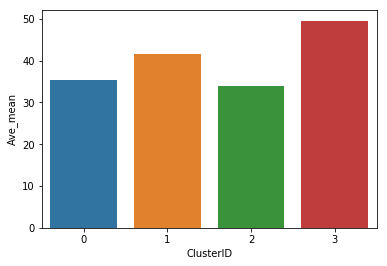

In [68]:
sns.barplot(x=df.ClusterID, y=df.Ave_mean)

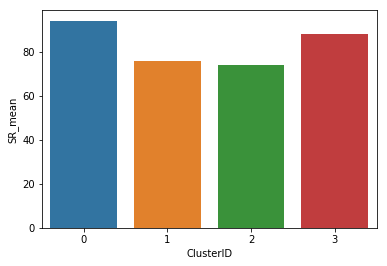

In [69]:
sns.barplot(x=df.ClusterID, y=df.SR_mean)

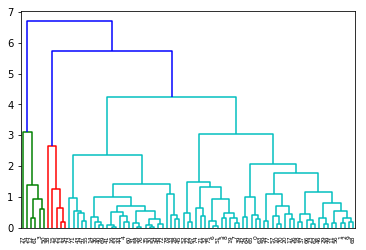

In [70]:
mergings = linkage(cricket3, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [71]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))
cricket2_hc = pd.concat([cricket2, clusterCut], axis=1)
cricket2_hc.columns = ['Player', 'Ave', 'SR', 'ClusterID']

In [72]:
km_clusters_ave = 	pd.DataFrame(cricket2_hc.groupby(["ClusterID"]).Ave.mean())
km_clusters_sr = 	pd.DataFrame(cricket2_hc.groupby(["ClusterID"]).SR.mean())

In [73]:
df = pd.concat([pd.Series([0,1,2,3]), km_clusters_ave, km_clusters_sr], axis=1)
df.columns = ["ClusterID", "Ave_mean", "SR_mean"]
df.head()

,ClusterID,Ave_mean,SR_mean
0,0,41.066829,78.366829
1,1,32.123333,99.933333
2,2,33.489630,74.390741
3,3,52.528000,88.628000


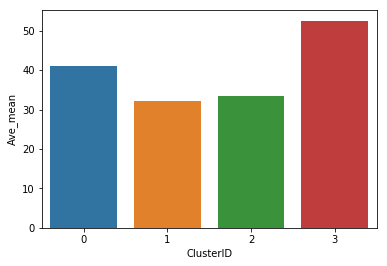

In [74]:
#plotting barplot
sns.barplot(x=df.ClusterID, y=df.Ave_mean)

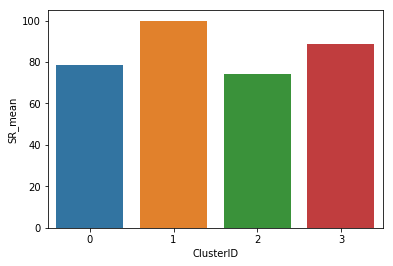

In [75]:
#plotting barplot
sns.barplot(x=df.ClusterID, y=df.SR_mean)

In [78]:
cricket2_hc.to_excel("Cricket_hc1.xlsx")